In [74]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

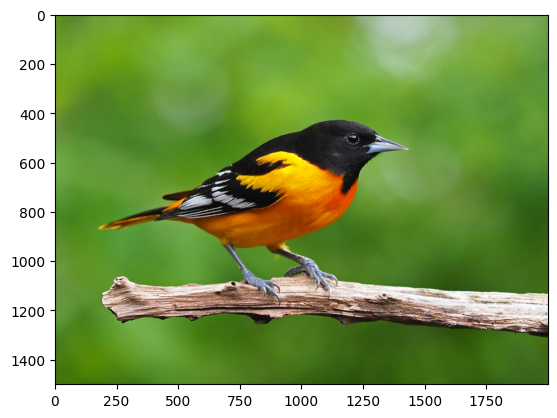

In [3]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

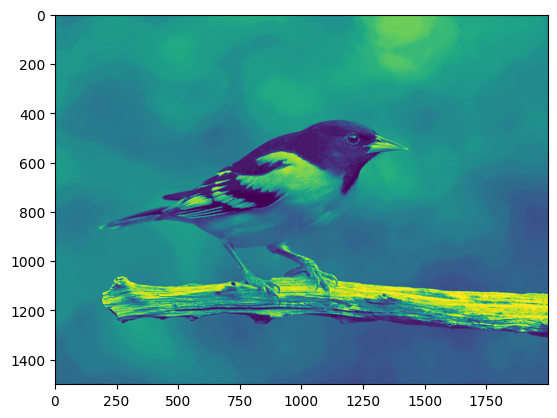

In [65]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F')
plt.imshow(data)
plt.show()

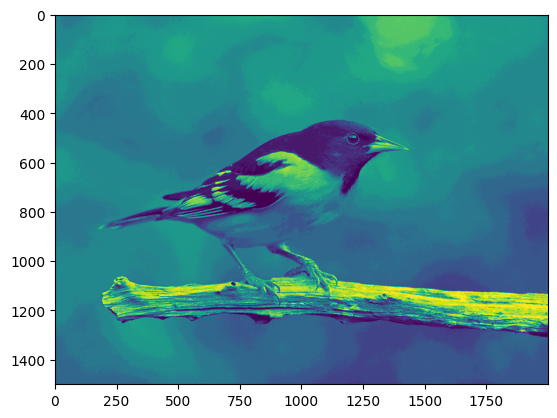

In [76]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread('bird.png', mode='F').astype(np.uint8)
c1 = data & 0xF0
iio.imsave('bird.png', c1)
tmp = iio.imread('bird.png')
plt.imshow(tmp)
plt.show()

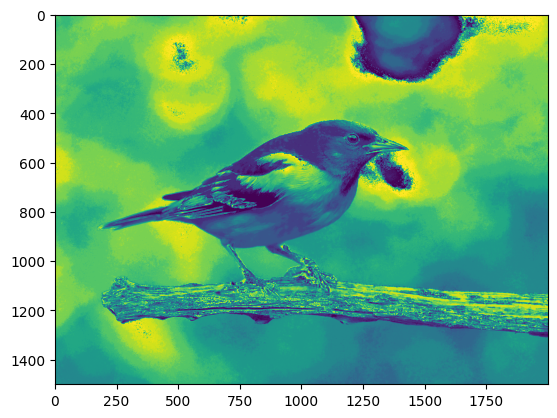

In [37]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

In [39]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.hsv_to_rgb(1, 1, 255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.0].


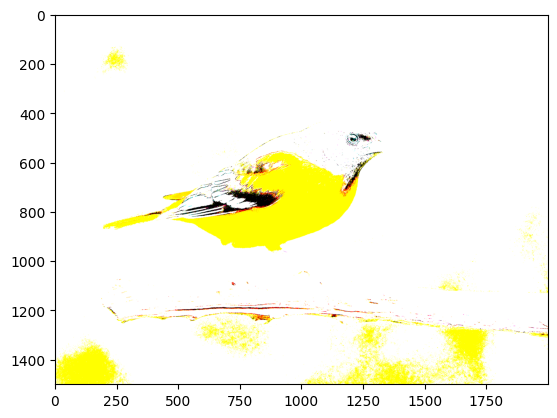

In [40]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys

rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

[[109 109 110 ... 116 115 113]
 [108 108 110 ... 114 113 112]
 [110 110 110 ... 114 113 112]
 ...
 [ 78  79  79 ...  64  64  64]
 [ 78  79  79 ...  64  64  64]
 [ 78  79  79 ...  64  64  64]]


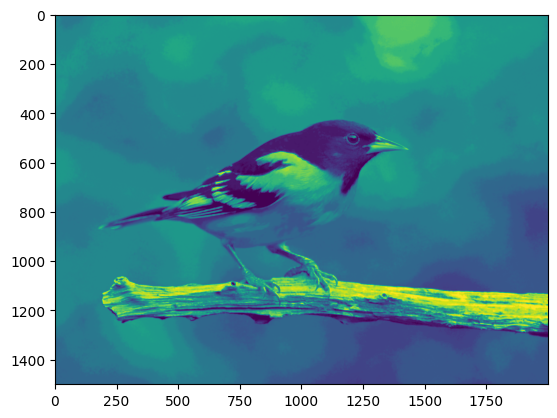

In [67]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import colorsys
a = iio.imread('bird.png', mode='F')
k = np.ones((5,5))/25
b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('bird_mean_filter.png', b)
print(b)
plt.imshow(b)
plt.show()

[[112 112 112 ... 112 112 112]
 [112 112 112 ... 112 112 112]
 [112 112 112 ... 112 112 112]
 ...
 [ 80  80  80 ...  64  64  64]
 [ 80  80  80 ...  64  64  64]
 [ 80  80  80 ...  64  64  64]]


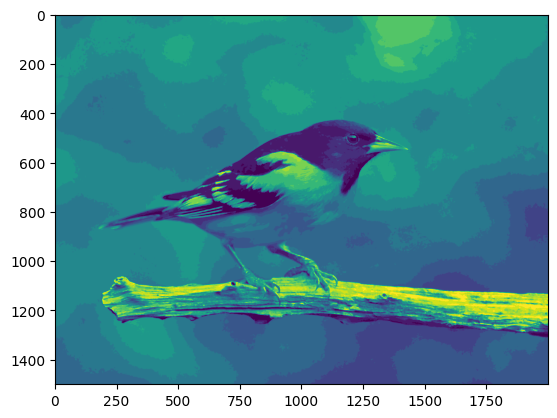

In [68]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F').astype(np.uint8)

# performing median filter
# size = 5: convolution
# footprint: a boolean array of the same dimension of image.
# The pixels in the input corresponding to the points to the
# footprint with true values are considered for filtering
# mode: padding (constant, reflect, nearest)
b = sn.median_filter(a, size=5, footprint=None, output=None,
                     mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_median_filter.png', b)
# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()

[[112 112 112 ... 128 128 128]
 [112 112 112 ... 128 128 128]
 [112 112 112 ... 128 128 128]
 ...
 [ 80  80  80 ...  64  64  64]
 [ 80  80  80 ...  64  64  64]
 [ 80  80  80 ...  64  64  64]]


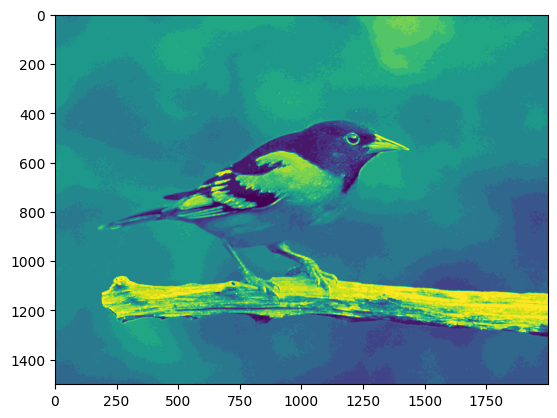

In [69]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F').astype(np.uint8)

# performing maximum filter
# size = 5: convolution
# footprint: a boolean array of the same dimension of image.
# The pixels in the input image corresponding to the points to the
# footprint with true values are considered for filtering
# mode: padding (constant, reflect, nearest)
b = sn.maximum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_max_filter.png', b)
# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()

[[ 96  96  96 ... 112 112 112]
 [ 96  96  96 ... 112 112 112]
 [ 96  96  96 ... 112 112 112]
 ...
 [ 64  64  64 ...  64  64  64]
 [ 64  64  64 ...  64  64  64]
 [ 64  64  64 ...  64  64  64]]


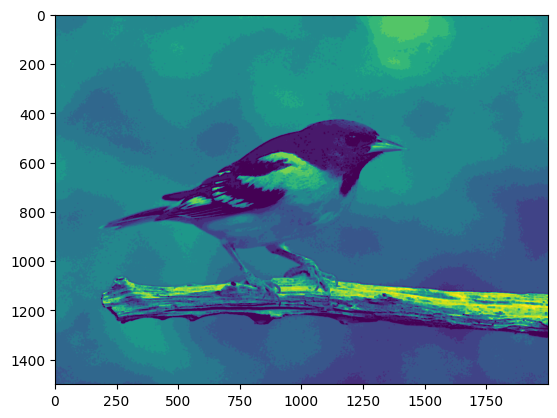

In [70]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F').astype(np.uint8)

# performing minimum filter
# size = 5: convolution
# footprint: a boolean array of the same dimension of image.
# The pixels in the input image corresponding to the points to the
# footprint with true values are considered for filtering
# mode: padding (constant, reflect, nearest)
b = sn.minimum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_min_filter.png', b)
# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()

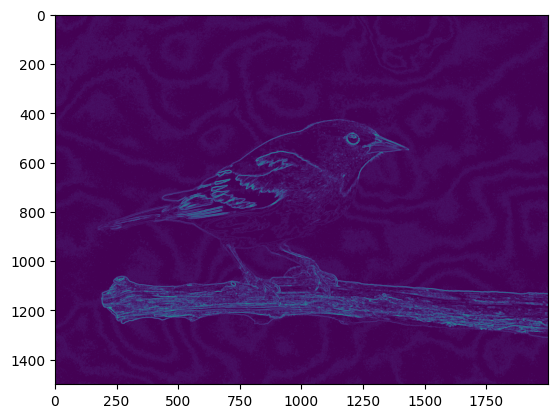

In [71]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pyplot as plt
import colorsys

# Sobel Edge Detection
# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F')
b = filters.sobel(a).astype(np.uint8)

iio.imsave('bird_sobel_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

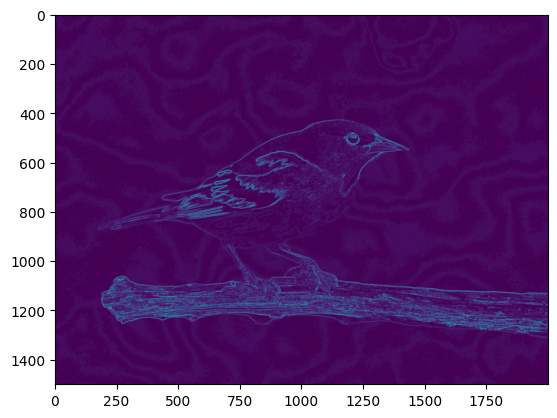

In [72]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pyplot as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F')
b = filters.prewitt(a).astype(np.uint8)

iio.imsave('bird_prewitt_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

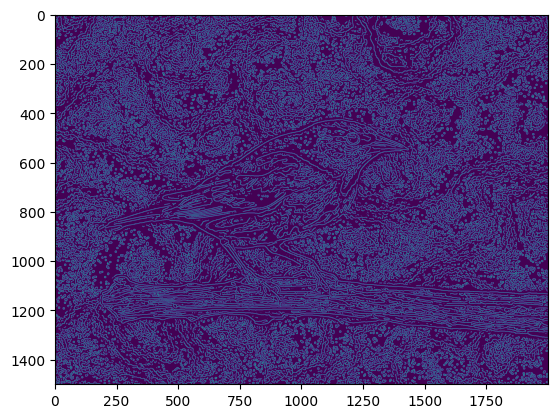

In [73]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pyplot as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='F')
b = feature.canny(a, sigma=3).astype(np.uint8)

iio.imsave('bird_canny_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()

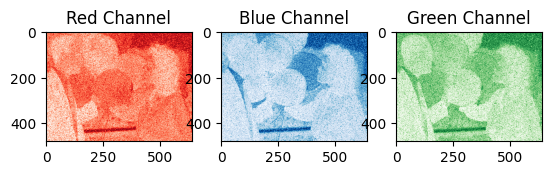

In [3]:
#Bài 1
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread('exercise/balloons_noisy.png')
plt.subplot(1, 3, 1)
plt.title("Red Channel")
plt.imshow(data[:,:,0], cmap = 'Reds')
plt.subplot(1, 3, 2)
plt.title("Blue Channel")
plt.imshow(data[:,:,2], cmap = 'Blues')
plt.subplot(1, 3, 3)
plt.title("Green Channel")
plt.imshow(data[:,:,1], cmap = 'Greens')
plt.show()

In [38]:
#Bài 2
import imageio.v2 as iio
import numpy as np
import os
os.makedirs('output_bai2', exist_ok=True)
image = iio.imread('exercise/flower.jpeg')
swapped1 = image[:, :, [1, 2, 0]]  
swapped2 = image[:, :, [2, 0, 1]] 
swapped3 = image[:, :, [2, 1, 0]]  
iio.imwrite('output_bai2/flower_gbr.png', swapped1)
iio.imwrite('output_bai2/flower_brg.png', swapped2)
iio.imwrite('output_bai2/flower_bgr.png', swapped3)

In [23]:
#Bài3
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
img = cv2.imread('exercise/balloons_noisy.png') 
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
cv2.imwrite('balloons1.jpg', h)
cv2.imwrite('balloons2.jpg', s)
cv2.imwrite('balloons3.jpg', v)

True

In [25]:
#Bài 4
H_new = h // 3
V_new = (3 * v) // 4
new_hsv = cv2.merge([H_new, s, V_new])
new_bgr = cv2.cvtColor(new_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('balloons4.jpg', new_bgr)

True

In [29]:
#Bài 5
import cv2

image_folder = 'exercise'
image_names = ['baby.jpeg', 'balloons_noisy.png', 'flower.jpeg']

image_folder = 'exercise'
for name in image_names:
    img = cv2.imread(f'exercise/{name}')
    median = cv2.medianBlur(img, 5)
    gaussian = cv2.GaussianBlur(img, (5, 5), 0)
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    cv2.imwrite(f'median_{name}', median)
    cv2.imwrite(f'gaussian_{name}', gaussian)
    cv2.imwrite(f'bilateral_{name}', bilateral)

In [30]:
#Bài 6
for name in image_names:
    img = cv2.imread(f'exercise/{name}')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    cv2.imwrite(f'edge_{name}', edges)

In [31]:
#Bài 7
for name in image_names:
    img = cv2.imread(f'exercise/{name}')
    b, g, r = cv2.split(img)
    shuffled = cv2.merge(np.random.permutation([b, g, r]))
    cv2.imwrite(f'rgb_shuffle_{name}', shuffled)

In [32]:
#Bài 8
for name in image_names:
    img = cv2.imread(f'exercise/{name}')
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    shuffled_hsv = cv2.merge(np.random.permutation([h, s, v]))
    shuffled_bgr = cv2.cvtColor(shuffled_hsv, cv2.COLOR_HSV2BGR)
    cv2.imwrite(f'hsv_shuffle_{name}', shuffled_bgr)

In [35]:
#Bài 9
import cv2
import numpy as np

image_folder = 'exercise'
image_names = ['baby.jpeg', 'balloons_noisy.png', 'flower.jpeg']
for name in image_names:
    img = cv2.imread(f'{image_folder}/{name}')
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    shuffled_channels = np.random.permutation([h, s, v])
    shuffled_hsv = cv2.merge(shuffled_channels)
    shuffled_bgr = cv2.cvtColor(shuffled_hsv, cv2.COLOR_HSV2BGR)
    cv2.imwrite(f'hsv_shuffle_{name}', shuffled_bgr)